# EDA And Data Visualization
## `Project By : Data Detectives`

## 1. Import Neccessory Libraries 

In [1]:
import nltk
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

## 2. Import Datasets

In [2]:
data = pd.read_csv('datasets/movies_dataset.csv')

In [3]:
data.head()

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,8844,Jumanji,Adventure Fantasy Family,When siblings Judy and Peter discover an encha...,English Français,RobinWilliams JonathanHyde KirstenDunst,JoeJohnston,6.9,2413.0,17.015539,65000000,boardgame disappearance basedonchildren'sbook ...,TriStar Pictures Teitler Film Interscope Commu...,262797249.0,104.0
2,15602,Grumpier Old Men,Romance Comedy,A family wedding reignites the ancient feud be...,English,WalterMatthau JackLemmon Ann-Margret,HowardDeutch,6.5,92.0,11.712900,0,fishing bestfriend duringcreditsstinger oldmen,Warner Bros. Lancaster Gate,0.0,101.0
3,31357,Waiting to Exhale,Comedy Drama Romance,"Cheated on, mistreated and stepped on, the wom...",English,WhitneyHouston AngelaBassett LorettaDevine,ForestWhitaker,6.1,34.0,3.859495,16000000,basedonnovel interracialrelationship singlemot...,Twentieth Century Fox Film Corporation,81452156.0,127.0
4,11862,Father of the Bride Part II,Comedy,Just when George Banks has recovered from his ...,English,SteveMartin DianeKeaton MartinShort,CharlesShyer,5.7,173.0,8.387519,0,baby midlifecrisis confidence aging daughter m...,Sandollar Productions Touchstone Pictures,76578911.0,106.0


## 3. Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44505 entries, 0 to 44504
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    44505 non-null  int64  
 1   title                 44505 non-null  object 
 2   genres                42321 non-null  object 
 3   overview              44505 non-null  object 
 4   spoken_languages      40805 non-null  object 
 5   cast                  42169 non-null  object 
 6   crew                  43702 non-null  object 
 7   vote_average          44505 non-null  float64
 8   vote_count            44505 non-null  float64
 9   popularity            44505 non-null  float64
 10  budget                44505 non-null  int64  
 11  keywords              30905 non-null  object 
 12  production_companies  33193 non-null  object 
 13  revenue               44505 non-null  float64
 14  runtime               44505 non-null  float64
dtypes: float64(5), int6

In [5]:
data.shape

(44505, 15)

In [6]:
data.describe()

,id,vote_average,vote_count,popularity,budget,revenue,runtime
count,44505.000000,44505.000000,44505.000000,44505.000000,4.450500e+04,4.450500e+04,44505.000000
mean,106935.034962,5.638517,112.071228,2.971717,4.313182e+06,1.144953e+07,94.979957
std,111822.197741,1.897163,496.317924,6.058232,1.759984e+07,6.499795e+07,37.573981
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,25950.000000,5.000000,3.000000,0.404000,0.000000e+00,0.000000e+00,85.000000
50%,58526.000000,6.000000,10.000000,1.159325,0.000000e+00,0.000000e+00,95.000000
75%,153162.000000,6.800000,35.000000,3.803268,0.000000e+00,0.000000e+00,107.000000
max,469172.000000,10.000000,14075.000000,547.488298,3.800000e+08,2.787965e+09,1256.000000


## 4. Data Visualization

### RunTime

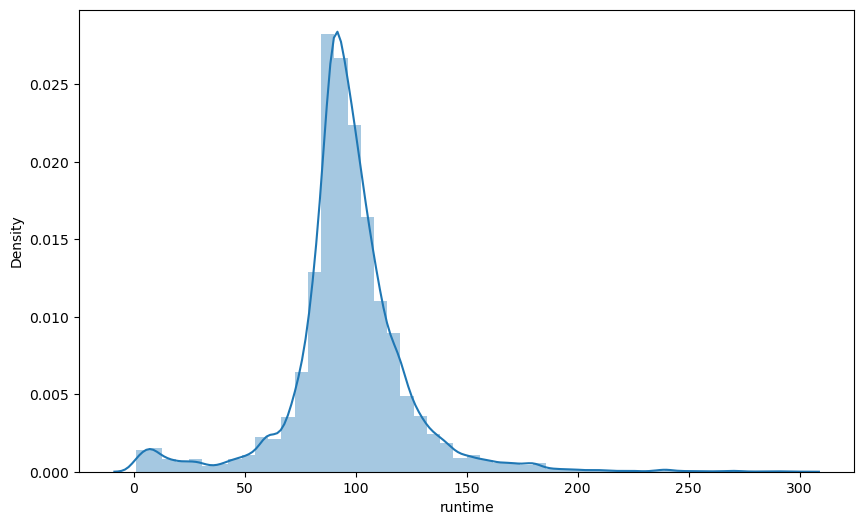

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(data[(data['runtime'] < 300) & (data['runtime'] > 0)]['runtime']);

In [8]:
data['runtime'].sample(10)

20375     95.0
22358    120.0
32968     90.0
34603     41.0
5397     116.0
32074     48.0
19917    103.0
1725     128.0
32532     60.0
3280     111.0
Name: runtime, dtype: float64

### Top 10 most Budget Movies

In [9]:
budget_by_movie = data[["title","budget"]]

In [10]:
budget_by_movie = budget_by_movie.sort_values("budget", ascending=False)
budget_by_movie.head(10)

,title,budget
17060,Pirates of the Caribbean: On Stranger Tides,380000000
11812,Pirates of the Caribbean: At World's End,300000000
26311,Avengers: Age of Ultron,280000000
11051,Superman Returns,270000000
18588,John Carter,260000000
16075,Tangled,260000000
43910,Transformers: The Last Knight,260000000
11765,Spider-Man 3,258000000
21033,The Lone Ranger,255000000
21906,The Hobbit: The Desolation of Smaug,250000000


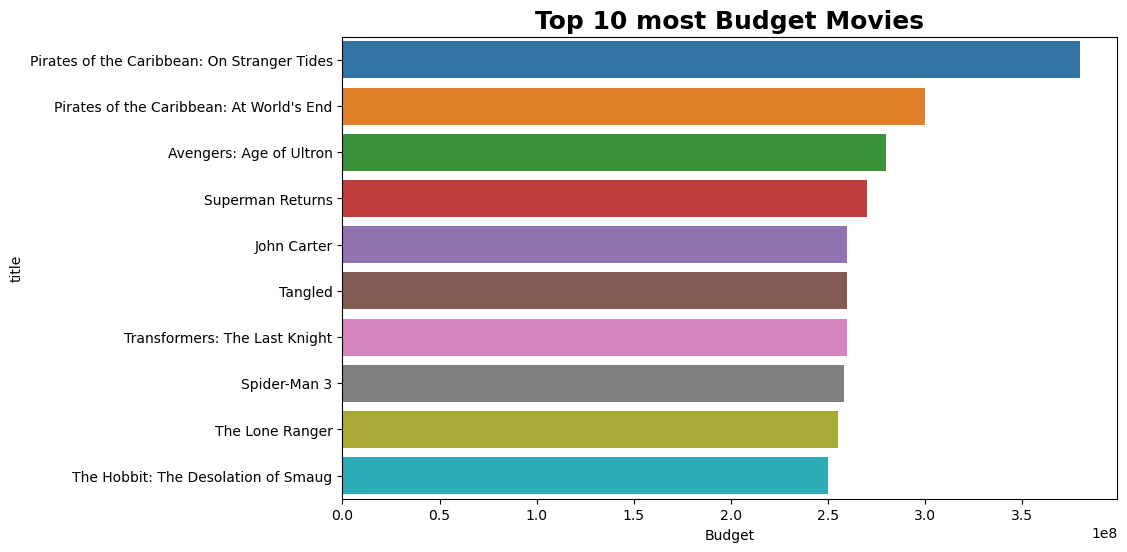

In [11]:
plt.figure(figsize=(10,6))
sorted_data = data.sort_values(by='budget', ascending=False)
top_10_popular_movies_vc = sorted_data.iloc[:10]
sns.barplot(y='title',x='budget',data=top_10_popular_movies_vc)

plt.xlabel("Budget")
plt.title("Top 10 most Budget Movies", fontsize = 18, fontweight = 'bold')
plt.show()

### Top 10 most Voted Movies

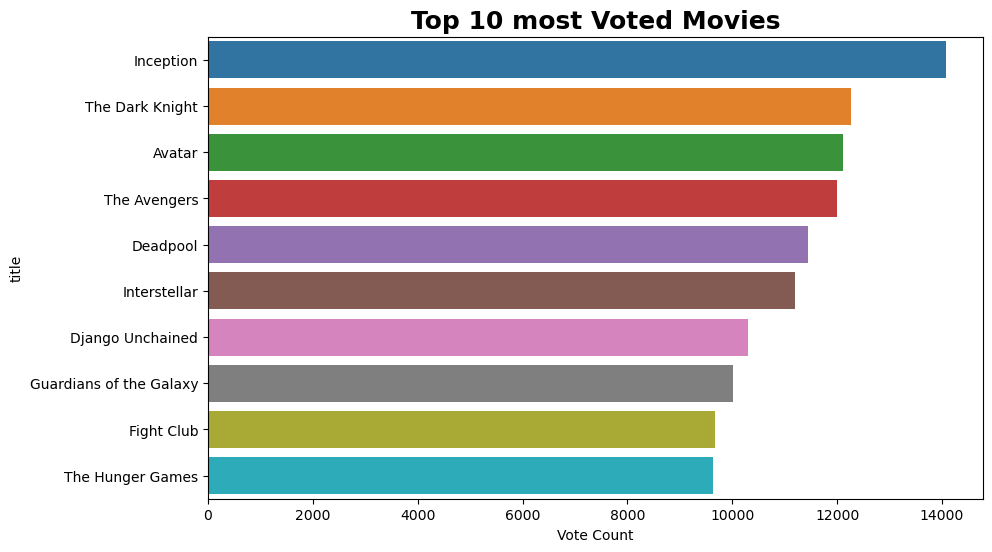

In [12]:
plt.figure(figsize=(10,6))
sorted_data = data.sort_values(by='vote_count', ascending=False)
top_10_popular_movies_vc = sorted_data.iloc[:10]
sns.barplot(y='title',x='vote_count',data=top_10_popular_movies_vc)

plt.xlabel("Vote Count")
plt.title("Top 10 most Voted Movies", fontsize = 18, fontweight = 'bold')
plt.show()

### Popular Movies

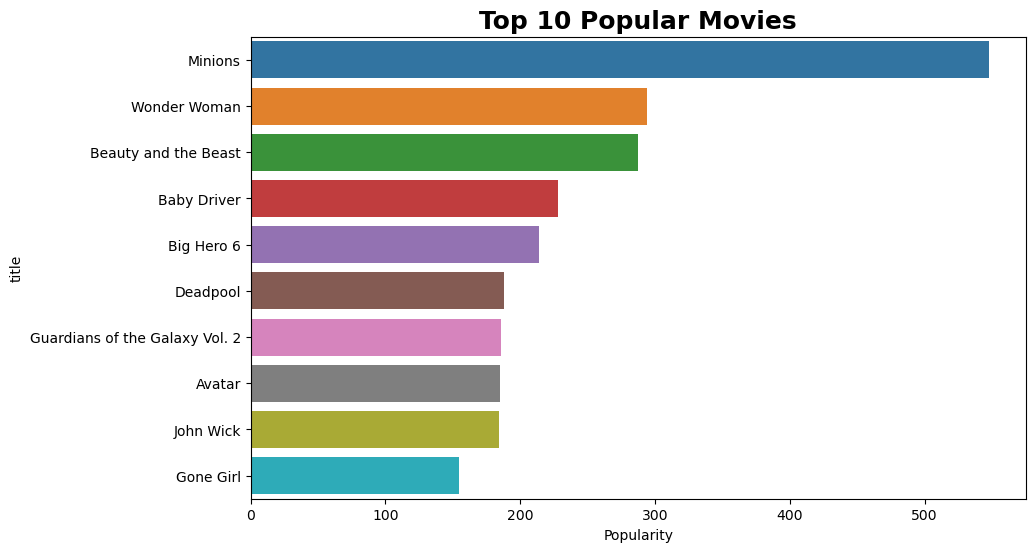

In [13]:
plt.figure(figsize=(10,6))
sorted_data = data.sort_values(by='popularity', ascending=False)
top_10_popular_movies = sorted_data.iloc[:10]
sns.barplot(y='title',x='popularity',data=top_10_popular_movies)

plt.xlabel("Popularity")
plt.title("Top 10 Popular Movies", fontsize = 18, fontweight = 'bold')
plt.show()

In [14]:
data.head(2)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,8844,Jumanji,Adventure Fantasy Family,When siblings Judy and Peter discover an encha...,English Français,RobinWilliams JonathanHyde KirstenDunst,JoeJohnston,6.9,2413.0,17.015539,65000000,boardgame disappearance basedonchildren'sbook ...,TriStar Pictures Teitler Film Interscope Commu...,262797249.0,104.0


### Word Clowds

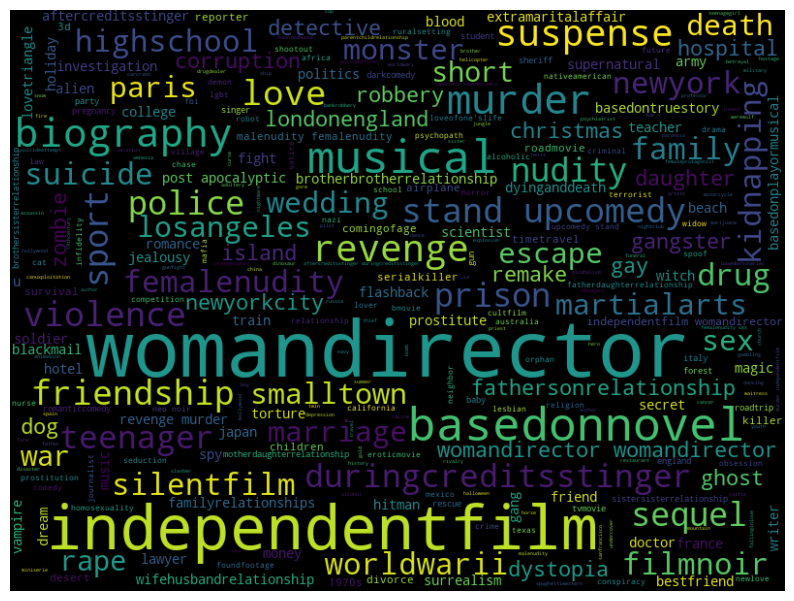

In [15]:
plt.subplots(figsize=(10,8))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words = data['keywords'].dropna().apply(nltk.word_tokenize)
word = []
for i in words:
    word.extend(i)
word = pd.Series(word)
word = ([i for i in word.str.lower() if i not in stop_words])
wordcloud = WordCloud(background_color="black", max_words=300, stopwords=stop_words, max_font_size= 80,width=800,height=600)
wordcloud.generate(" ".join(word))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Top 10 most revenue generated movies

In [16]:
data[data['revenue'].notnull()][['title', 'budget', 'revenue']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue
14517,Avatar,237000000,2.787965e+09
26308,Star Wars: The Force Awakens,245000000,2.068224e+09
1626,Titanic,200000000,1.845034e+09
17736,The Avengers,220000000,1.519558e+09
24884,Jurassic World,150000000,1.513529e+09
28538,Furious 7,190000000,1.506249e+09
26311,Avengers: Age of Ultron,280000000,1.405404e+09
17361,Harry Potter and the Deathly Hallows: Part 2,125000000,1.342000e+09
21957,Frozen,150000000,1.274219e+09
41405,Beauty and the Beast,160000000,1.262886e+09


In [17]:
top_rev = data[data['revenue'].notnull()][['title', 'budget', 'revenue']].sort_values('revenue', ascending=False).head(10)
top_rev = top_rev.set_index('title')

In [18]:
top_rev = top_rev['revenue'].head(10)
top_rev.index

Index(['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers',
       'Jurassic World', 'Furious 7', 'Avengers: Age of Ultron',
       'Harry Potter and the Deathly Hallows: Part 2', 'Frozen',
       'Beauty and the Beast'],
      dtype='object', name='title')

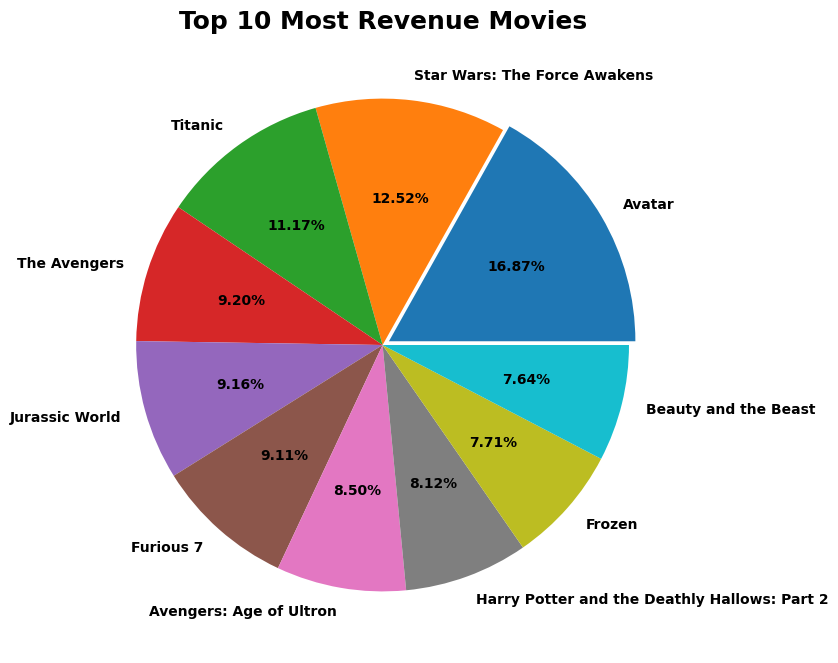

In [19]:
plt.figure(figsize = (8,8))
plt.pie(top_rev, labels=top_rev.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Revenue Movies", fontsize = 18, fontweight = 'bold');

### Top 10 popular movies

In [20]:
data[data['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).head(10)

,title,popularity
30343,Minions,547.488298
32886,Wonder Woman,294.337037
41405,Beauty and the Beast,287.253654
42763,Baby Driver,228.032744
24259,Big Hero 6,213.849907
26317,Deadpool,187.860492
26319,Guardians of the Galaxy Vol. 2,185.330992
14517,Avatar,185.070892
24155,John Wick,183.870374
23491,Gone Girl,154.801009


In [21]:
top_pop = data[data['popularity'].notnull()][['title','popularity']].sort_values('popularity',ascending=False).head(10)
top_pop = top_pop.set_index('title')

In [22]:
top_pop = top_pop['popularity'].head(10)
top_pop.index

Index(['Minions', 'Wonder Woman', 'Beauty and the Beast', 'Baby Driver',
       'Big Hero 6', 'Deadpool', 'Guardians of the Galaxy Vol. 2', 'Avatar',
       'John Wick', 'Gone Girl'],
      dtype='object', name='title')

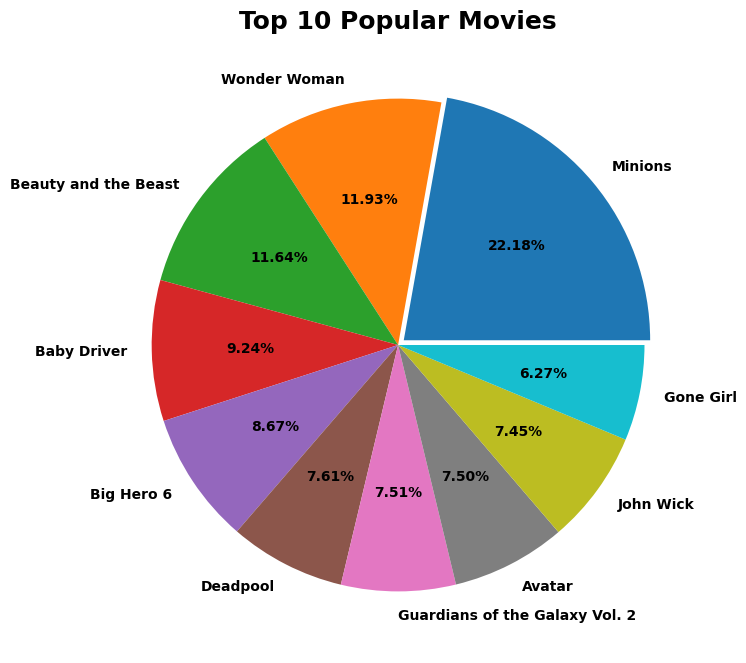

In [23]:
plt.figure(figsize = (8,8))
plt.pie(top_pop, labels=top_pop.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Popular Movies", fontsize = 18, fontweight = 'bold');

### Top 10 Most Frequent Movie

In [24]:
top_movie = data['title'].value_counts().head(10)
top_movie.index

Index(['Cinderella', 'Hamlet', 'Alice in Wonderland', 'Les Misérables',
       'Beauty and the Beast', 'Treasure Island', 'A Christmas Carol',
       'First Love', 'Bluebeard', 'The Stranger'],
      dtype='object')

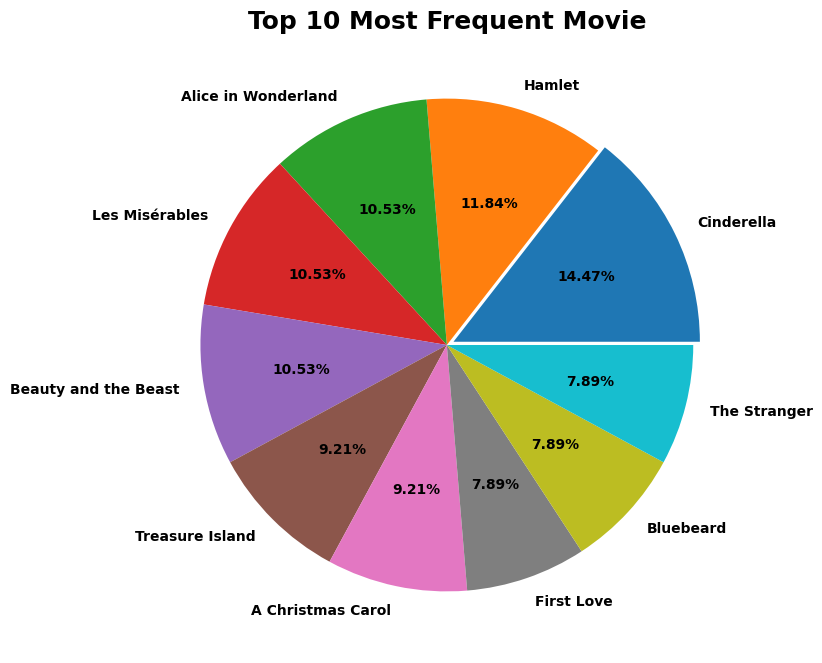

In [25]:
plt.figure(figsize = (8,8))
plt.pie(top_movie, labels=top_movie.index,
        explode = [0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct= '%.2f%%', textprops = {'size' : 10, 'fontweight': 'bold'})

plt.title("Top 10 Most Frequent Movie", fontsize = 18, fontweight = 'bold');

# Thank You